In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

# Exploratory data analysis (EDA)

The **goal** of this notebook is to understand the distribution of the data that was provided to us.

We have a dataset of logs of a span of 5 minutes representing users events on a marketplace. Some of the events come from bots producing fake clicks and leads.

Let's start by taking a look at how our data looks like.

In [2]:
df = pd.read_csv("../data/fake_users.csv")

In [3]:
df.head()

,Unnamed: 0,UserId,Event,Category,Fake
0,0,F7A7BF3761,click_carrousel,Phone,0
1,1,BA8F7A71E6,send_sms,Motor,0
2,2,21C64F22FC,send_email,Jobs,0
3,3,F9E0306603,send_sms,Jobs,0
4,4,1B2143BACC,click_ad,Phone,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100473 entries, 0 to 100472
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100473 non-null  int64 
 1   UserId      100473 non-null  object
 2   Event       100473 non-null  object
 3   Category    100473 non-null  object
 4   Fake        100473 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


The first conclusion can be summarized as follow:
- We have 100 473 entries.
- There are no `Null` values, so we don't have to work on ways to replace values.
- The class to predict is represented under the `Fake` columns.
- We only have categorial variables in the form of `Event` and `Category`.
- `Unnamed` and `UserId` are dataset artifact, not something useful for analysis (we can remove them).

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("UserId", axis=1, inplace=True)

Let's take some more look at our data.

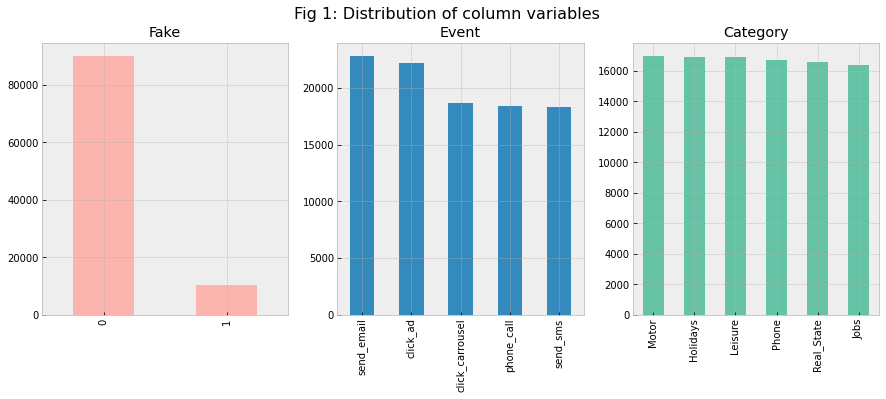

In [6]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
df['Fake'].value_counts().plot(ax = axes[0], subplots=True,  kind='bar', colormap="Pastel1") 
df['Event'].value_counts().plot(ax = axes[1], subplots=True,  kind='bar')
df['Category'].value_counts().plot(ax = axes[2], subplots=True,  kind='bar', colormap="Set2")
fig.suptitle('Fig 1: Distribution of column variables', fontsize=16)
plt.show()

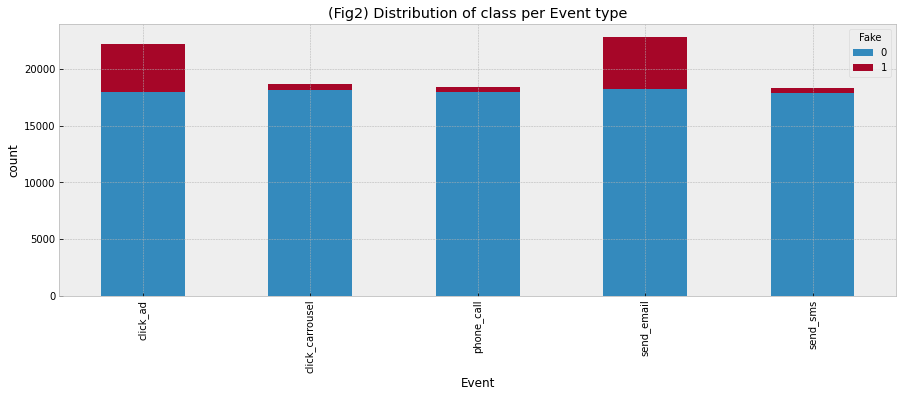

In [7]:
df_event = df.groupby(['Event', 'Fake'])['Event'].count().unstack('Fake').fillna(0).plot(kind='bar', ylabel="count", title="(Fig2) Distribution of class per Event type", stacked=True, figsize=(15, 5))

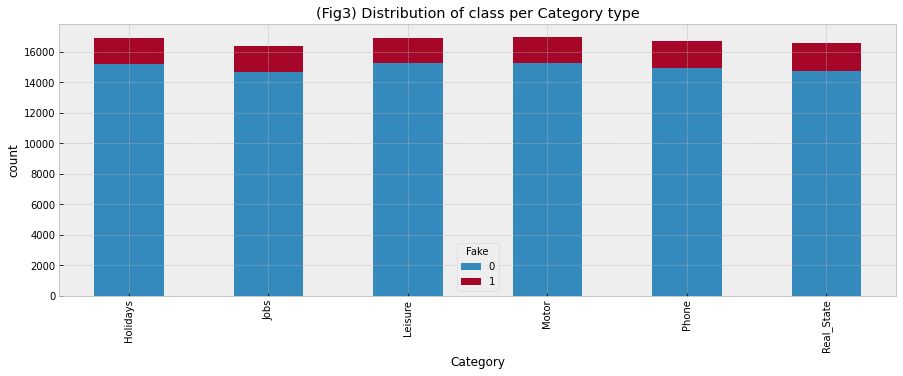

In [8]:
df_category = df.groupby(['Category', 'Fake'])['Category'].count().unstack('Fake').fillna(0).plot(kind='bar', ylabel="count", title="(Fig3) Distribution of class per Category type", stacked=True, figsize=(15, 5))

In [9]:
print(f" `Not fake` represents {round(df['Fake'].value_counts()[0]/len(df) * 100,2)} % of the train dataset")
print(f" `Fake`represents {round(df['Fake'].value_counts()[1]/len(df) * 100,2)} % of the train dataset")

 `Not fake` represents 89.69 % of the train dataset
 `Fake`represents 10.31 % of the train dataset


Final conclusions:

- Our data is imbalanced. We can see that the first plot in (Fig 1). Most of the entries are `Not Fake`. Therefore if we use this data as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most events are not Fake.
- (Fig2) tells us that `click_add` and `send_Email` events are more likely to be `Fake`.
- We are facing an [anomaly detection](https://www.semanticscholar.org/paper/Anomaly-detection%3A-A-survey-Chandola-Banerjee/71d1ac92ad36b62a04f32ed75a10ad3259a7218d) problem. In the following notebook we will see how we can tackle this problem.